In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.special import jv

In [94]:
@np.vectorize
def exact(X, Y):
    # X = 2kq/(k2+q2)
    # Y = |k-q|^2/(2z(1-z)E)
    # (k2+q2)/(2z(1-z)E) = Y/(1-X)
    # 2kq/(2z(1-z)E) = Y*X/(1-X)
    def df(x):
        cos = np.cos(x)
        return X*cos/(1 - X*cos) * (1-np.cos(Y/(1-X) - cos*Y*X/(1-X)))
    return quad(df, 0, 2*np.pi)[0]/2./np.pi

@np.vectorize
def Gen(kt2LoverEstuff, q2overkt2):
    X = 2*np.sqrt(q2overkt2)/(1+q2overkt2)
    Y = kt2LoverEstuff*(1+q2overkt2)*(1-X)
    return exact(X, Y)

@np.vectorize
def HT(kt2LoverEstuff, q2overkt2):
    return 2*q2overkt2*(1-np.cos(kt2LoverEstuff))

@np.vectorize
def HT2(kt2LoverEstuff, q2overkt2):
    X = 2*np.sqrt(q2overkt2)/(1+q2overkt2)
    if (X>.5):
        if (kt2LoverEstuff*(1-X)>10):
            return 1/np.sqrt(1-X**2)-1
        else:
            return Gen(kt2LoverEstuff, q2overkt2)
    Y = kt2LoverEstuff*(1+q2overkt2)*(1-X)
    A = Y/(1-X)
    B = Y*X/(1-X)
    J0 = jv(0,B)
    J1 = jv(1,B)
    J0_p1 = -J1
    J0_p2 = J1/B - J0
    J0_p3 = ( (B**2-2)*J1 + B*J0 )/B**2
    J0_p4 = (B**2-3)/B**3 * (B*J0 - 2*J1)
    d = X
    cos = np.cos(A)
    sin = np.sin(A)
    return d*sin*J0_p1 + d**2*(.5+cos*J0_p2)#\
         #- d**3*sin*J0_p3 + d**4*(3./8.-cos*J0_p4)

0.19801980198019803


/home/weiyao/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  # Remove the CWD from sys.path while we load stuff.
/home/weiyao/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  # Remove the CWD from sys.path while we load stuff.


0.5749595745760689


/home/weiyao/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  # Remove the CWD from sys.path while we load stuff.
/home/weiyao/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  # Remove the CWD from sys.path while we load stuff.


0.8426500884694862


/home/weiyao/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  # Remove the CWD from sys.path while we load stuff.


0.9428090415820635


/home/weiyao/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  # Remove the CWD from sys.path while we load stuff.
/home/weiyao/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from spli

0.9986139979479093


/home/weiyao/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  # Remove the CWD from sys.path while we load stuff.
/home/weiyao/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from spli

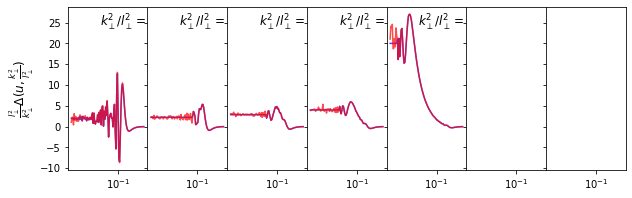

In [95]:
x = np.exp(np.linspace(-2,10,100))
fig, axes = plt.subplots(1,7, figsize=(10,3),sharex=True, sharey=True)
for q2overkt2, ax in zip([.01,.1,.3,.5,.9], axes.flatten()):
    print(2*q2overkt2**.5/(1+q2overkt2))
    scale = np.min([q2overkt2, 1/q2overkt2])
    ax.plot(1/x, HT2(x,q2overkt2)/scale,'b-',alpha=.7)
    ax.plot(1/x, Gen(x,q2overkt2)/scale,'r-',alpha=.7,lw=1.5)
    ax.semilogx()
    #ax.plot(1/x,x/x,'k-')
    if ax.is_first_col():
        ax.set_ylabel(r"$\frac{l_\perp^2}{k_\perp^2}\Delta(u,\frac{k_\perp^2}{l_\perp^2})$", fontsize=12)
    ax.annotate("$k_\perp^2/l_\perp^2 = {}$".format(s),xy=(.4,.88), xycoords="axes fraction", fontsize=12)
#axes[1].set_xlabel(r"$u = \frac{2z(1-z)p^+}{k_\perp^2 t^+}$", fontsize=12)

plt.subplots_adjust(wspace=0,)

In [36]:
@np.vectorize
def approx(X, Y):
    if X<.5:
        delta = X
        A = Y/(1-X)
        B = A*delta
        return (delta**2 - 2*delta*np.sin(A)*jv(1,B) 
               + 2*delta**2*np.cos(A)*(jv(1,B)/B-jv(0,B)) 
               )/2.
    else:
        if Y > 10:
            return (1./np.sqrt(1.-X**2)-1.)
        else:
            return exact(X, Y)

/home/weiyao/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  # Remove the CWD from sys.path while we load stuff.
/home/weiyao/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from spli

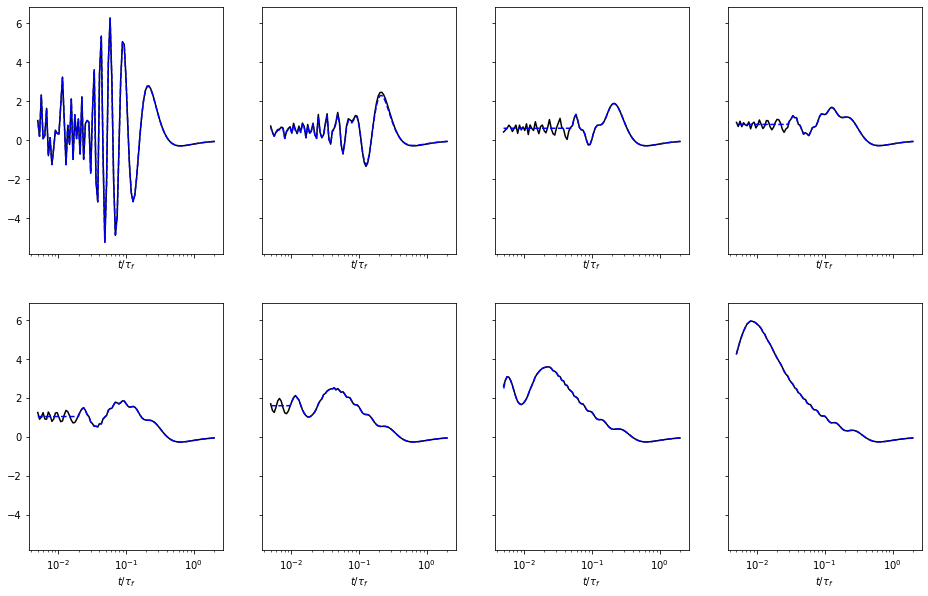

In [54]:
fig, axes = plt.subplots(2,4,figsize=(16,10), sharex=True, sharey=True)
axes = axes.flatten()
for i, delta in enumerate([.1,.3,.5,.7,.8,.9,.95,.98]):
    A = np.exp(np.linspace(np.log(.5*(1-delta)), np.log(200*(1-delta)),101))
    ax = axes[i]
    ax.plot((1-delta)/A, exact(delta, A)/delta**2, 'k-')  
    ax.plot((1-delta)/A, approx(delta, A)/delta**2, 'b--')
    ax.semilogx()
    ax.set_xlabel(r"$t/\tau_f$")



In [37]:
a = .1
zm = .1
zM = 1.-zm
N = (1+2*a)*np.log(zM/zm) + a*(1./zm-1./zM)

In [49]:

def PDF(z):
    return 1./N*(
    (1+a)*np.log(z/zm) + a*(1./zm-1./z) 
        + a*np.log(zM/(1.-z))
    )
def sample(nsamples=10000):
    Ntot = 0
    z = []
    for i in range(nsamples):
        left=zm
        right=zM
        r = np.random.rand()
        while (right-left)>1e-3:
            Ntot+=1
            mid = (right+left)/2.
            if PDF(mid)<r:
                left=mid
            else:
                right=mid
        z.append(mid)
    return np.array(z), Ntot*1./nsamples
        

10.0


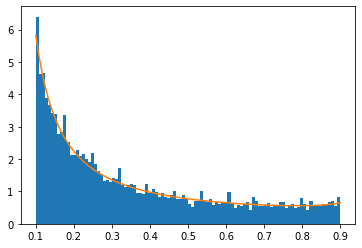

In [50]:
z, num = sample()
print(num)
_ = plt.hist(z, bins=100, density=True)

x = np.linspace(zm, zM, 100)
dx = x[1]-x[0]
Y = 1./x+a/(x**2*(1-x))
plt.plot(x, Y/Y.sum()/dx)
